In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_dataset():
    return pd.read_csv("googleplaystore.csv")

def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape, end="\n\n")
    print("First 10 rows of dataset:")
    pd.set_option('display.max_columns', None)
    display(dataset.head(10))
    #pd.reset_option('all')
    print("\nStatistical summary:")
    display(dataset.describe())

def clean_dataset(df):
    #Remove empty values from the dataset
    df.dropna(inplace=True)
    
    #Drop Duplicate
    df.drop_duplicates(inplace=True)
    
    #Convert strings to int
    df["Rating"] = df["Rating"].astype(int)
    df["Reviews"] = df["Reviews"].astype(int)
    
    #Remove + and comma from downloads
    df["Installs"] = df["Installs"].str.replace("+", "", regex=False)
    df["Installs"] = df["Installs"].str.replace(",", "")
    df["Installs"] = df["Installs"].astype(int)
#     df["Installs"] = df["Installs"]/100000
#     df["Installs"] = df["Installs"].astype(int)
    
    #Remove $ from price
    df["Price"] = df["Price"].str.replace("$", "", regex=False)
    df["Price"] = df["Price"].astype(float)
    
    return df

def compute_correlations_matrix(data):
    return data.corr(method="pearson")

def print_scatter_matrix(dataset):
    #sns.pairplot(dataset)
    pd.plotting.scatter_matrix(dataset, figsize=(20,20))
    plt.show()

def print_histograms(dataframe):
    dataframe.hist()

In [2]:
## Dataset before applying Data Cleaning
raw_data=load_dataset()
print_summarize_dataset(raw_data)

Dataset dimension:
(10841, 13)

First 10 rows of dataset:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up



Statistical summary:


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [3]:
## Data Summary after cleaning
data = clean_dataset(raw_data)
print_summarize_dataset(data)

Dataset dimension:
(8886, 13)

First 10 rows of dataset:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3,178,19M,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4,36815,29M,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up



Statistical summary:


,Rating,Reviews,Installs,Price
count,8886.000000,8.886000e+03,8.886000e+03,8886.000000
mean,3.774027,4.730928e+05,1.650061e+07,0.963526
std,0.568963,2.906007e+06,8.640413e+07,16.194792
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,1.000000e+04,0.000000
50%,4.000000,4.723000e+03,5.000000e+05,0.000000
75%,4.000000,7.131325e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


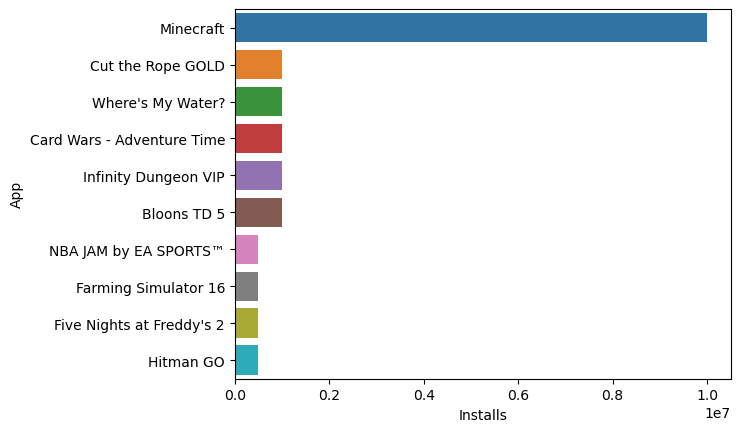

In [4]:
## Plot with bar diagram the most populars paid apps of Family category
#Filter apps which belongs to family and are paid
fam_data = data[(data["Category"] == "FAMILY") & (data["Type"]!="Free")]

#Sort them by their installs number (this accounts for their popularity)
fam_data = fam_data.sort_values(by=["Installs"], ascending=False)

#display(fam_data.head(20))
sns.barplot(y=fam_data["App"][:11], x=fam_data["Installs"][:11])

plt.show()

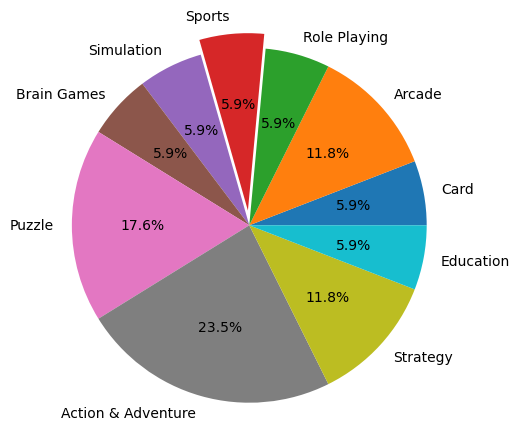

In [5]:
##Plot with a pie diagram the most popular genres according to the number of installations from paid family
#Get the genres for the top apps
top10_genre = []
for genre in fam_data["Genres"][:11][::-1].values:
    unique = genre.split(";")
    for val in range(len(unique)):
        top10_genre.append(unique[val])

unique_genre = list(set(top10_genre))
freq = [top10_genre.count(x) for x in unique_genre]

plt.pie(freq, labels= unique_genre, radius = 1.2, autopct = '%1.1f%%', explode=(0,0,0,0.1,0,0,0,0,0,0))
plt.show()

In [6]:
##Analysis of Category

#An array with the number of installation per category
cat_grp = data.groupby(["Category"])
sum_cat = cat_grp["Installs"].sum()
print(sum_cat)

Category
ART_AND_DESIGN           124228100
AUTO_AND_VEHICLES         53129800
BEAUTY                    26916200
BOOKS_AND_REFERENCE     1916291655
BUSINESS                 863518120
COMICS                    56036100
COMMUNICATION          24152241530
DATING                   206522410
EDUCATION                533852000
ENTERTAINMENT           2455660000
EVENTS                    15949410
FAMILY                 10041080590
FINANCE                  770312400
FOOD_AND_DRINK           257777750
GAME                   31543862717
HEALTH_AND_FITNESS      1361006220
HOUSE_AND_HOME           125082000
LIBRARIES_AND_DEMO        61083000
LIFESTYLE                534741120
MAPS_AND_NAVIGATION      724267560
MEDICAL                   42162676
NEWS_AND_MAGAZINES      5393110650
PARENTING                 31116110
PERSONALIZATION         2074341930
PHOTOGRAPHY             9721243130
PRODUCTIVITY           12463070180
SHOPPING                2573331540
SOCIAL                 12513841475
SPORTS     

In [7]:
sum_ = (sum_cat/sum_cat.sum())*100
sum_ = sum_.sort_values(ascending=False)
sum_[:7].values.tolist()
sum(sum_[7:].values.tolist())

23.692390004513726

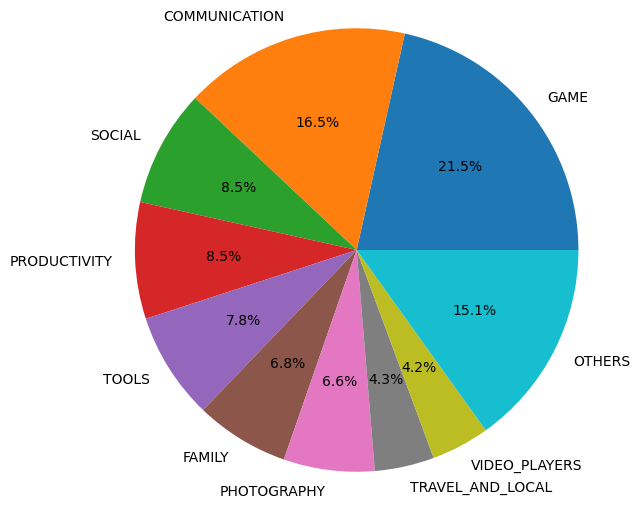

In [8]:
#Plot a pie with the number of installation per category
sorted_cat = sum_cat.sort_values(ascending=False)
n = 9
top_cat = sorted_cat[:n].index.tolist() + ["OTHERS",]
cat_freq = sorted_cat[:n].values.tolist() + [sum(sorted_cat[n:].values.tolist()),] 
plt.pie(cat_freq, labels= top_cat, radius = 1.5, autopct = '%1.1f%%')
plt.show()

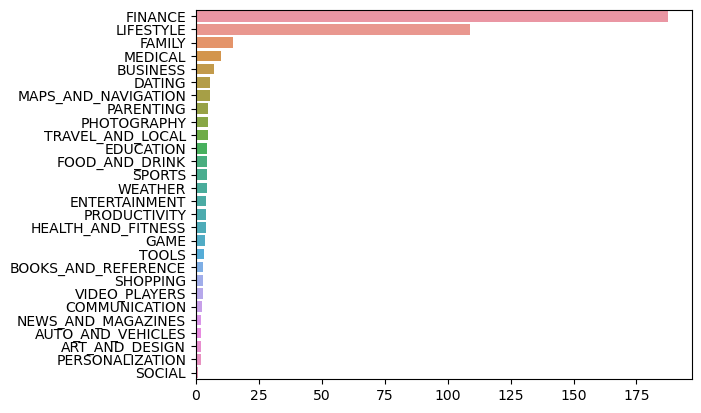

In [9]:
#Plot a bar with the mean price per category
cat_grp_paid = data[data["Type"] !="Free"].groupby(["Category"])
mean = cat_grp_paid["Price"].mean().sort_values(ascending=False)
mean_data = mean.index.values.tolist()
mean_values = mean.values.tolist()
sns.barplot(y=mean_data, x=mean_values)
plt.show()

In [10]:
#Most expensive apps per category
cat_grp_paid[["App","Price"]].max()

,App,Price
Category,,
ART_AND_DESIGN,"X Launcher Pro: PhoneX Theme, OS11 Control Center",1.99
AUTO_AND_VEHICLES,Ulysse Speedometer Pro,1.99
BOOKS_AND_REFERENCE,Officiel du SCRABBLE LAROUSSE,4.60
BUSINESS,TurboScan: scan documents and receipts in PDF,17.99
COMMUNICATION,pretty Easy privacy p≡p,4.99
DATING,"Moco+ - Chat, Meet People",7.99
EDUCATION,Toca Life: Hospital,5.99
ENTERTAINMENT,My Talking Pet,4.99
FAMILY,"sugar, sugar",399.99


In [11]:
## Correlation 
correlations = compute_correlations_matrix(data[["Installs", "Price"]])
correlations

,Installs,Price
Installs,1.000000,-0.011334
Price,-0.011334,1.000000


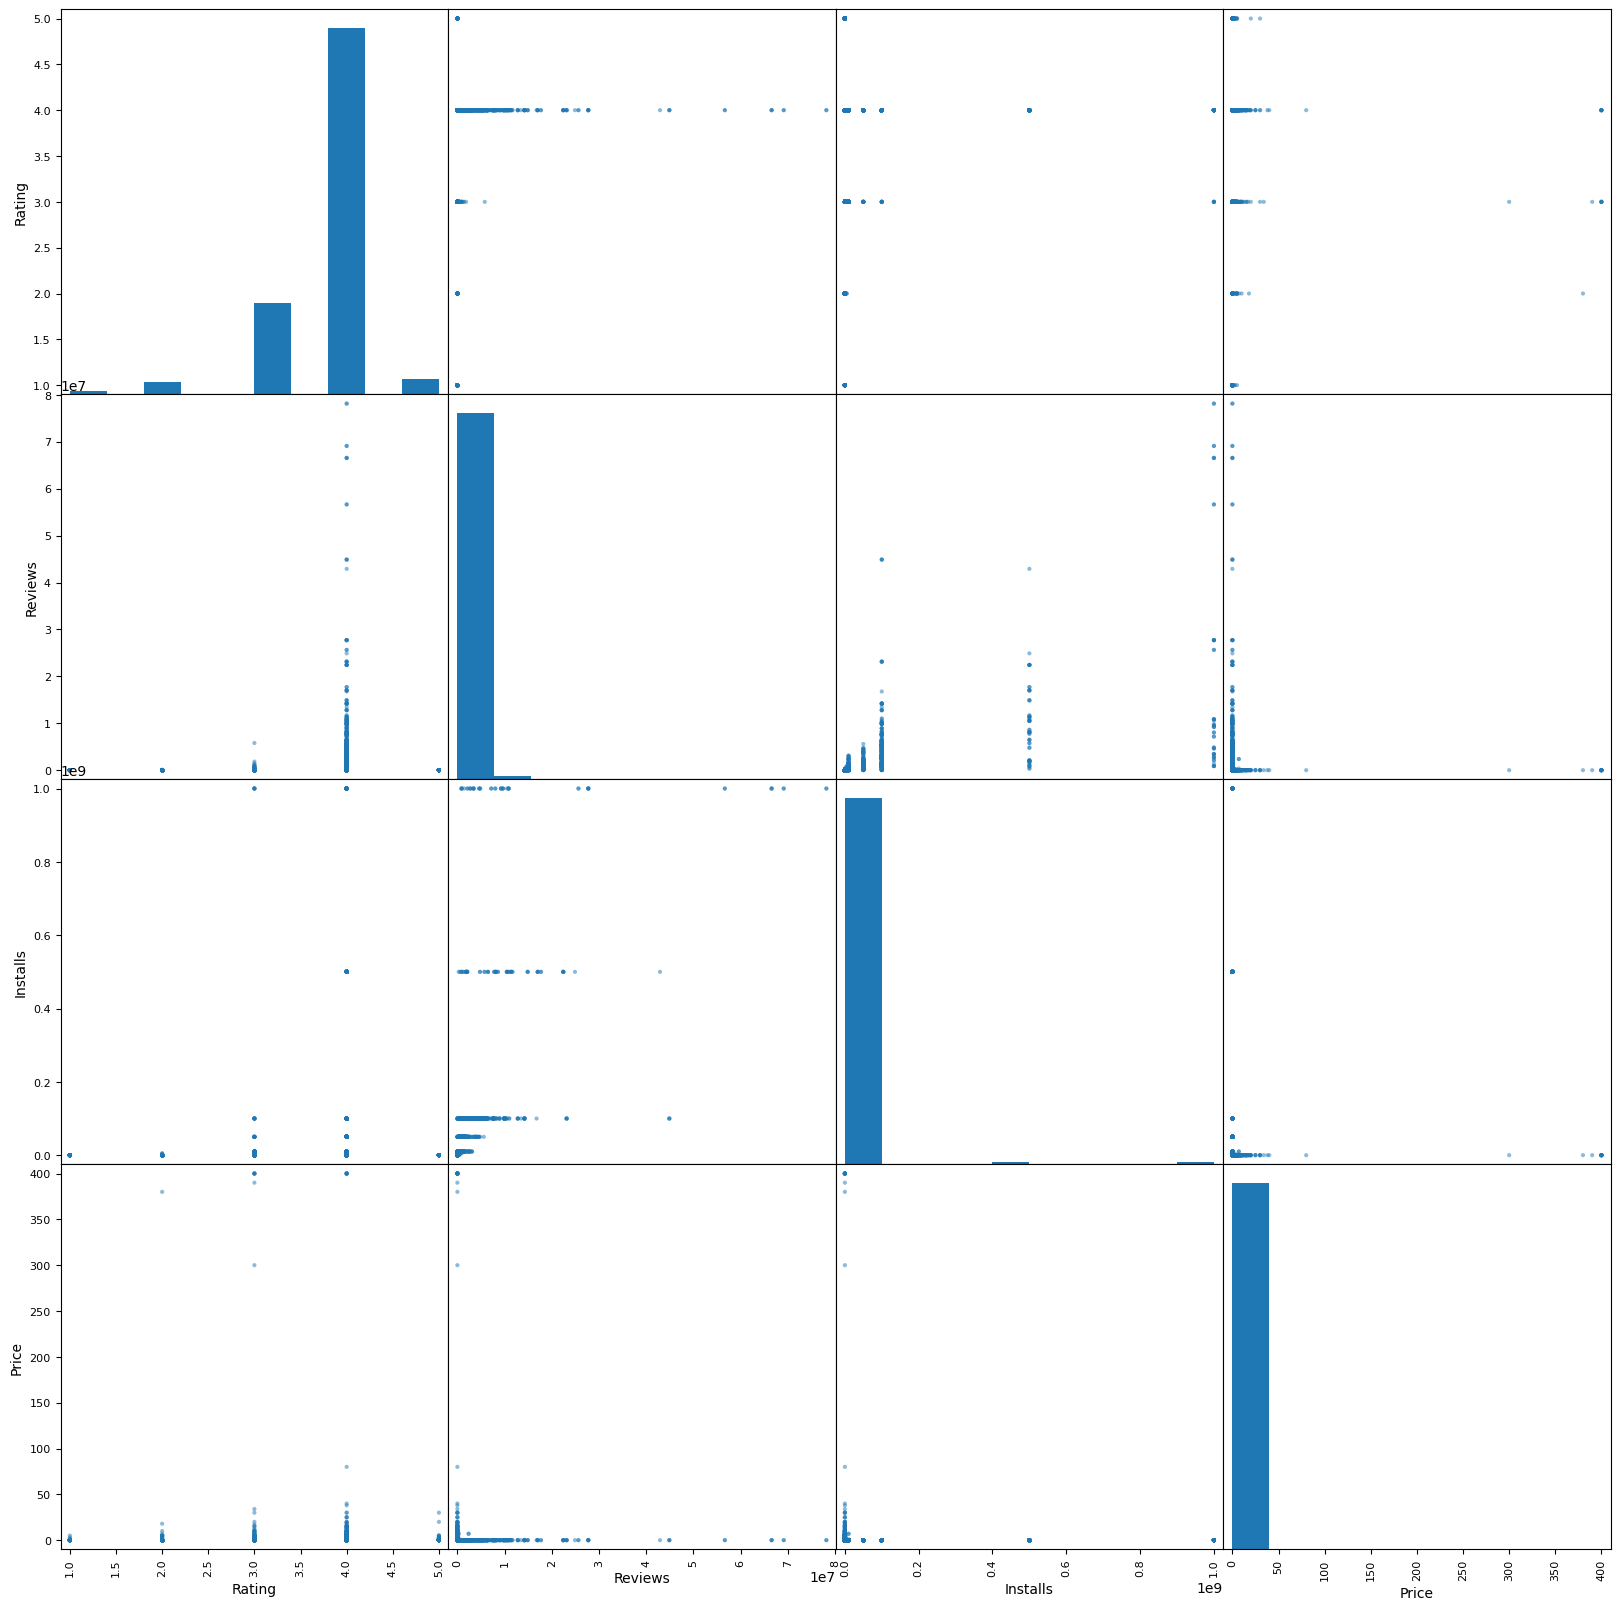

In [20]:
print_scatter_matrix(data)